<a href="https://colab.research.google.com/github/hokoro/Crawling/blob/main/hollyscrawing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

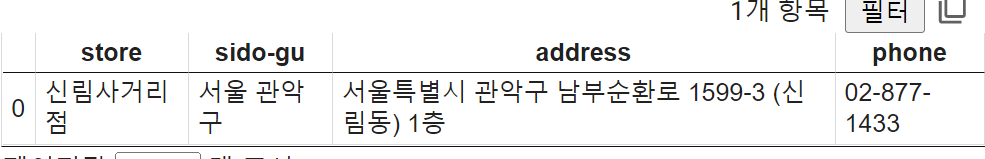


In [ ]:
from bs4 import BeautifulSoup #파이썬 전용 크롤링 라이브러리
import urllib.request #url 관련 처리 라이브러리
import pandas as pd #pandas 데이터 관리 전용 라이브러리
import datetime #일정/시간 관련 라이브러리 

##Beautiful soup 
- 웹 크롤링을 손쉽게 할수있는 파이썬 전용 크롤링 라이브러리 이다.

BeautifulSoup(html, 'html.parser') 
- 선언문은 html 문서로 읽어야 하고 , html parser 는 크롤링이 인식하는 데이터가 html 이기 때문에 html.parser 이라고 객체를 선언 한다.

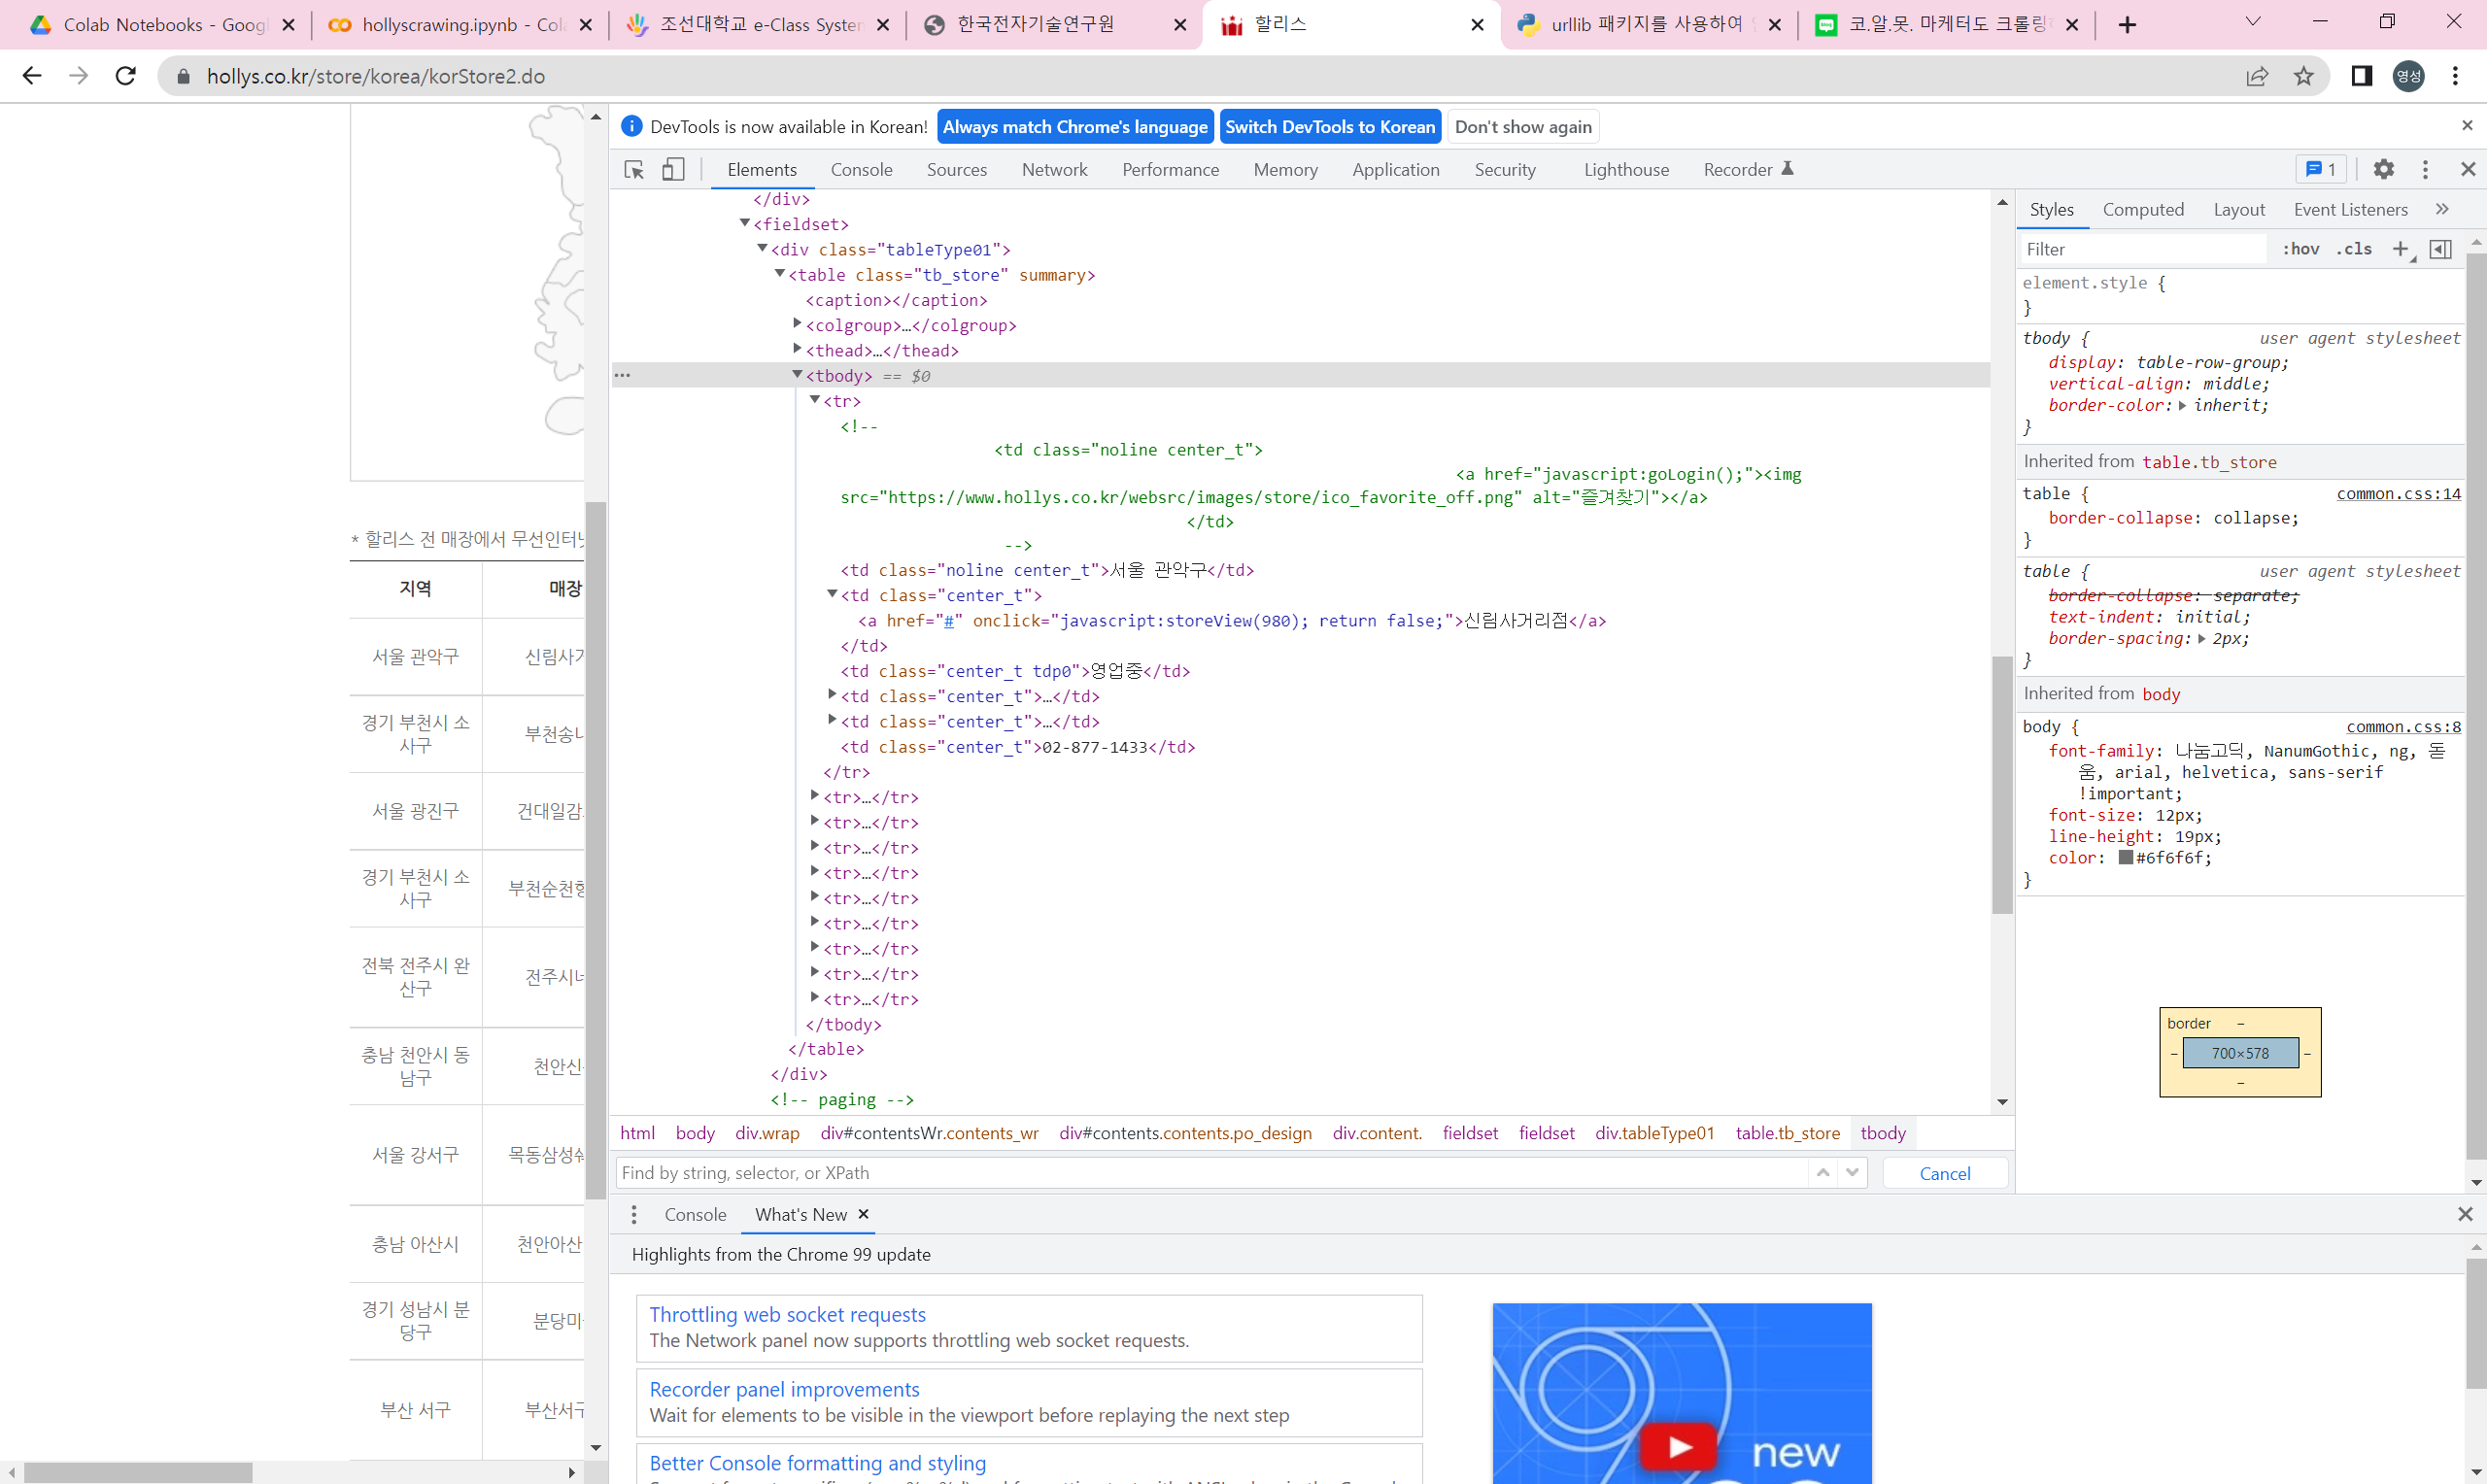

In [ ]:
def hollys_store(result):
  for page in range(1,59):
    hollys_url = 'https://www.hollys.co.kr/store/korea/korStore2.do?pageNo=1&sido=&gugun=&store=' #힐리스 매장 검색 url
    print(hollys_url) #url 주소 출력
    html = urllib.request.urlopen(hollys_url) #해당 url 을 읽어오기 위한 함수
    soupHollys = BeautifulSoup(html,'html.parser') #beautlfulsoup 객체 호출 (매개변수 = 호출한 url , 'html.parser') 
    print(type(soupHollys))
    tag_tbody = soupHollys.find('tbody') #hollys html 문서에서 tbody 라는 태그를 찾는다 
    print(tag_tbody)
    for store in tag_tbody.find_all('tr'): #tbody 안에서 tr 이라는 태그를 찾아 온다
      if len(store) <=3: #크롤링 을 중단하기 위한 조건문
        break
      
      store_td  = store.find_all('td') #td  태그를 찾는다
      store_name = store_td[1].string #td 태그의 두번쨰 값 = 매장의 이름 (신림 사거리점)
      store_sido = store_td[0].string #td 태그의 첫번쨰 값 = 매장의 시도 주소 (서울 관악구)
      store_address = store_td[3].string #td 태그의 세번쨰 값 = 매장 주소(서울특별시 관악구 남부 순환로 1599-3(신림동))
      store_phone = store_td[5].string #td 태그의 여섯번쨰 값 = 매장 번호 = (02-877-1433)

      print(store_name , store_sido , store_address , store_phone)
      result.append([store_name] + [store_sido] + [store_address] + [store_phone]) # 해당 정보를 하나의 리스트로 저장
      #리스트는 전역 변수 이기 떄문에 refrence 접근 체계를 사용한다.
  return 
  

  


In [ ]:
def main():
  result = [] #해당 결과를 저장하는 리스트
  print('Holys store crawling >>>>>>>>>>>>>>>>>>>')
  hollys_store(result) #hollys 정보를 호출하는 메서드 
  hollys_tbl = pd.DataFrame(result,columns = ('store','sido-gu','address','phone')) #csv 파일로 저장하기 위해 데이터 프레임 형식으로 제작

  hollys_tbl.to_csv('hollys1.csv',encoding = 'utf-8',mode = 'w',index = True) #데이터 프레임을 csv 형식으로 변환하기 위한 사용
  del result[:] #result 리스트 삭제 

In [ ]:
if __name__ == '__main__':
  main()

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
				 -->
<td class="noline center_t">충남 공주시</td>
<td class="center_t"><a href="#" onclick="javascript:storeView(976); return false;">동학사점</a></td>
<td class="center_t tdp0">영업중</td>
<td class="center_t"><a href="#" onclick="javascript:storeView(976); return false;">충남 공주시 반포면 동학사2로 133 1,2층 .</a></td>
<td class="center_t">
<img alt="테라스" src="https://www.hollys.co.kr/websrc/images/store/img_store_s02.gif" style="margin-right:1px"/>
<img alt="주차" src="https://www.hollys.co.kr/websrc/images/store/img_store_s08.png" style="margin-right:1px"/>
</td>
<td class="center_t">070-8836-8038</td>
</tr>
<tr>
<!--
				<td class="noline center_t">
																<a href="javascript:goLogin();"><img src="https://www.hollys.co.kr/websrc/images/store/ico_favorite_off.png" alt="즐겨찾기"></a>
									</td>
				 -->
<td class="noline center_t">서울 광진구</td>
<td class="center_t"><a href="#" onclick="javascript:storeView(975); return false;">건대일감호수점</a></td>
<td class="center